In [4]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

In [5]:
filename = 'cities.txt'
with open(filename) as f:
    content = f.read().splitlines()
data = content[1:]
data = [[int(j) for j in i.split()] for i in data]

In [6]:
arr = np.array(data)

In [7]:
cities = content[0].split()[2:]
cities

['Berlin',
 'Brussels',
 'Helsinki',
 'London',
 'Madrid',
 'Moscow',
 'Paris',
 'Rejkjavik',
 'Rome',
 'Stockholm']

In [27]:
D = np.square(arr)

In [28]:
H = np.identity(10) - np.full((10, 10), 1/10)
#H

In [29]:
B = (-1/2)*np.matmul(H,np.matmul(D,H))
#B

In [68]:
B

array([[  118186.83,   -66317.17,   212661.28,  -175394.62,  -216678.27,
          510272.28,   -99657.52,  -617481.22,   221417.03,   112991.38],
       [  -66317.17,   172979.83,  -507381.72,   234471.88,   693240.23,
         -707503.72,   278596.48,   -10164.22,   264121.03,  -352042.62],
       [  212661.28,  -507381.72,  1528160.73,  -694116.17, -2108593.32,
         2110259.23,  -829460.57,    17920.23,  -797070.02,  1067620.33],
       [ -175394.62,   234471.88,  -694116.17,   399647.93,   874917.78,
        -1183665.67,   367690.53,   585089.83,    36331.08,  -444972.57],
       [ -216678.27,   693240.23, -2108593.32,   874917.78,  2945356.63,
        -2700110.82,  1144964.88,  -532944.32,  1407045.43, -1507198.22],
       [  510272.28,  -707503.72,  2110259.23, -1183665.67, -2700110.82,
         3488021.73, -1119396.07, -1553269.27,  -217802.02,  1373194.33],
       [  -99657.52,   278596.48,  -829460.57,   367690.53,  1144964.88,
        -1119396.07,   453382.13,   -92221.07

In [30]:
e_val, e_vec = LA.eigh(B)
e_vec1 = np.flip(e_vec,1)
e_val1 = np.flip(e_val,0)

In [31]:
B1 = np.matmul(e_vec1,np.matmul(np.diag(e_val1),e_vec1.T))

In [32]:
e_val1[e_val1<0] = 0

In [33]:
Y = np.matmul(e_vec1,np.diag(np.sqrt(e_val1)))

In [34]:
embedding = Y[:,:2]

In [35]:
embedding

array([[ -186.83728043,   284.43419905],
       [  410.58855316,    23.62969135],
       [-1235.64557904,   -70.54466244],
       [  577.32047016,  -253.40964642],
       [ 1681.72802492,   347.79932744],
       [-1745.34486475,   662.12650721],
       [  667.76520339,    77.22144364],
       [  105.64209253, -2079.18904988],
       [  580.47080013,  1186.40508467],
       [ -855.68742007,  -178.47289462]])

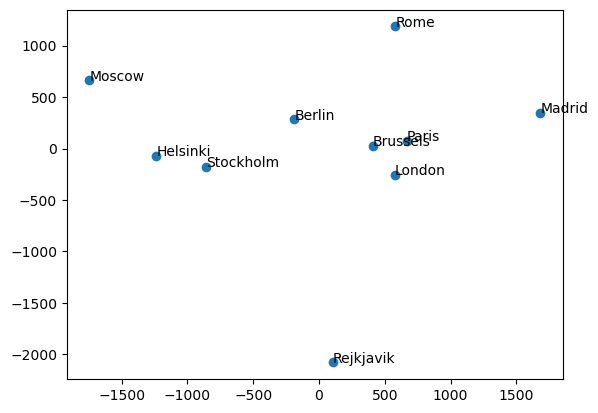

In [36]:
y = [embedding[i][1] for i in range(10)]
x = [embedding[i][0] for i in range(10)]
fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(cities):
    ax.annotate(txt, (x[i], y[i]))

In [37]:
angle = 140.
theta = (angle/180.) * np.pi

rotMatrix = np.array([[np.cos(theta), -np.sin(theta)], 
                         [np.sin(theta),  np.cos(theta)]])

In [38]:
embed_rotate = [np.matmul(embedding[i],rotMatrix) for i in range(10)]

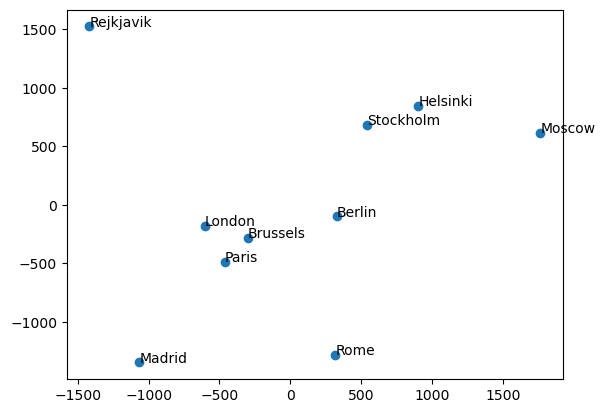

In [39]:
y = [embed_rotate[i][1] for i in range(10)]
x = [embed_rotate[i][0] for i in range(10)]
fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(cities):
    ax.annotate(txt, (x[i], y[i]))

In [54]:
embedding = MDS(n_components=2,dissimilarity='precomputed',normalized_stress='auto').fit_transform(arr)
embedding

array([[  183.52595042,   284.17648957],
       [  183.93764841,  -367.06612051],
       [ -555.78494689,  1105.40443288],
       [   -2.84260375,  -629.71673537],
       [  995.78045943, -1398.9964342 ],
       [  -84.51230422,  1866.23248618],
       [  336.74485611,  -580.92059564],
       [-1864.81335255,  -927.88240749],
       [ 1313.30863893,   -64.25927139],
       [ -505.3443459 ,   713.02815594]])

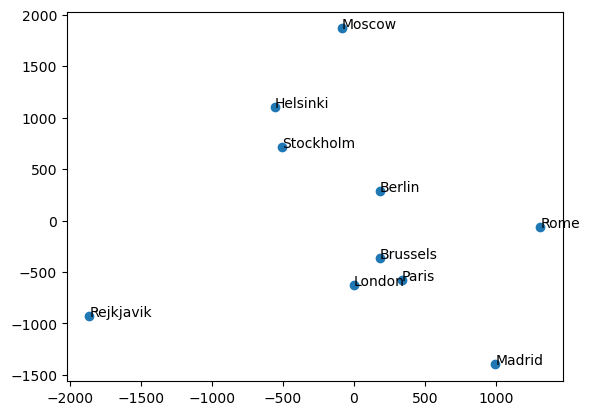

In [55]:
y = [embedding[i][1] for i in range(10)]
x = [embedding[i][0] for i in range(10)]
fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(cities):
    ax.annotate(txt, (x[i], y[i]))

In [65]:
angle = 70.
theta = (angle/180.) * np.pi

rotMatrix = np.array([[np.cos(theta), -np.sin(theta)], 
                         [np.sin(theta),  np.cos(theta)]])

In [66]:
embed_rotate = [np.matmul(embedding[i],rotMatrix) for i in range(10)]

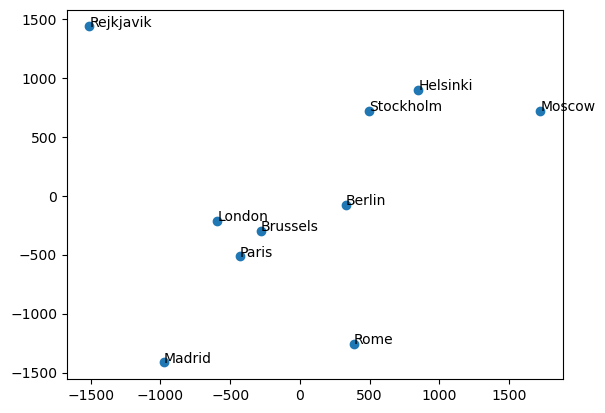

In [67]:
y = [embed_rotate[i][1] for i in range(10)]
x = [embed_rotate[i][0] for i in range(10)]
fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(cities):
    ax.annotate(txt, (x[i], y[i]))